In [1]:
# This notebook can be used to investigate a range of different K and delta parameters for specified c and n
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
from skimage.metrics import peak_signal_noise_ratio as compute_psnr
import time

from wnnm_final import *

In [2]:
# Load the clean image and add noise
clean = io.imread('test_images_greyscale/2.gif').astype(float)/255
sigma = 0.1
noisy = np.clip(clean + np.random.normal(loc=0.0, scale=sigma, size=clean.shape),0,1)

# Store outputs in dictionary
filtered = {}

In [3]:
# Set the fixed parameters for the algorithm
patchRadius = 3
sigma_n = 0.1
N_threshold = 50
c = 0.005

# Set the lists of parameters to be tuned
deltas = [0.05,0.1,0.25]
Ks = [1,3,5]
# Perform denoising for the different parameters
for delta in deltas:
    for K in Ks:
        # Initialize the output
        out_wnnc = np.zeros_like(noisy)
        
        # Perform denoising prining the time it takes for indication on progress
        tic = time.perf_counter()
        out_wnnc = wnnm(noisy.reshape((noisy.shape[0],noisy.shape[1],1)),patchRadius, delta, c, K, sigma_n,N_threshold).reshape((noisy.shape[0],noisy.shape[1]))
        toc = time.perf_counter()
        print(toc-tic)
        
        # Store the produced image
        filtered[f'K_{K}_delta_{delta}'] = out_wnnc

124.871559417
365.73391349999997
598.6404739159999
123.52318762499999
364.8028255840002
605.8238335829999
122.34821358299996
369.0193570000001
610.2699290840001


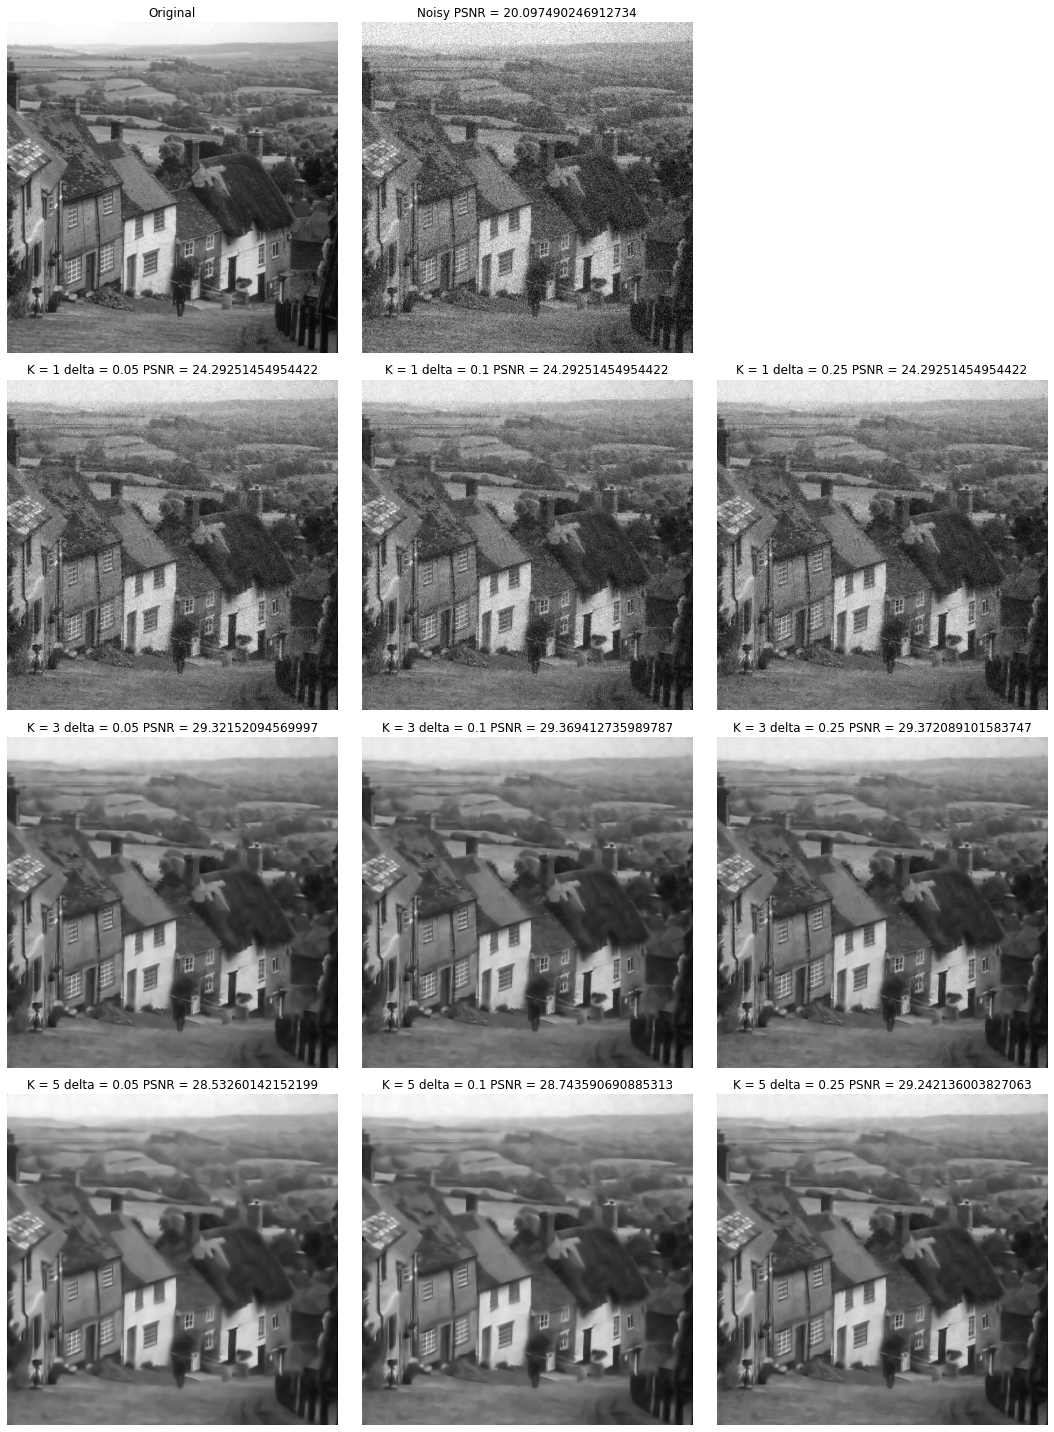

In [4]:
# Compute psnr of the noisy image
psnr_noisy = compute_psnr(clean,noisy)

# Plot the clean and noisy images
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
ax[0,0].imshow(clean,cmap='gray')
ax[0,0].set_title(f'Original')
ax[0,0].axis('off')
ax[0,1].imshow(noisy,cmap='gray')
ax[0,1].set_title(f'Noisy PSNR = {psnr_noisy}')
ax[0,1].axis('off')
ax[0,2].remove()

# Save the clean and noisy images to appropriate location
io.imsave('results_greyscale/wnnm_parameter_tuning/K_and_delta/'+'clean'+'.png', (clean*255).astype(np.uint8))
io.imsave('results_greyscale/wnnm_parameter_tuning/K_and_delta/'+'noisy'+'.png', (noisy*255).astype(np.uint8))

# Initialize psnr results
psnr = np.zeros((3,3))
# Plot and save the denoised images for the different parameters investigated
for i in range(3):
    for j in range(3):
        psnr = compute_psnr(clean,filtered[f'K_{Ks[i]}_delta_{deltas[j]}'])
        ax[i+1,j].imshow(filtered[f'K_{Ks[i]}_delta_{deltas[j]}'],cmap='gray')
        ax[i+1,j].set_title(f'K = {Ks[i]} delta = {deltas[j]} PSNR = {psnr}')
        ax[i+1,j].axis('off')
        
        io.imsave('results_greyscale/wnnm_parameter_tuning/K_and_delta/'+f'K_{Ks[i]}_delta_{deltas[j]}'+'.png',
                  (filtered[f'K_{Ks[i]}_delta_{deltas[j]}']*255).astype(np.uint8))

plt.tight_layout()
plt.show()